In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
train_df = pd.read_csv('train.csv', header=0)
test_df = pd.read_csv('test.csv', header=0)

In [33]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [34]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:
def get_titles(name):
    if ('.') in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [38]:
titles = sorted(set([x for x in train_df.Name.map(lambda x: get_titles(x))]))

In [39]:
train_df['Title'] = train_df.Name.map(lambda x: get_titles(x))

In [40]:
test_df['Title'] = test_df.Name.map(lambda x: get_titles(x))

In [41]:
titles

['Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess']

In [42]:
def sort_titles(x):
    title = x['Title']
    if title in ['Capt','Col','Don','Dona','Dr','Jonkheer','Major','Rev','Sir','the Countess','Lady']:
        return 'Rare'
    elif title in ['Mlle','Ms']:
        return 'Miss'
    elif title == 'Mme':
        return 'Mrs'
    else:
        return title
    

In [43]:
train_df['Title'] = train_df.apply(sort_titles, axis=1)

In [44]:
test_df['Title'] = test_df.apply(sort_titles, axis=1)

In [45]:
train_df.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [46]:
test_df.Title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [47]:
train_df['Title'] = train_df.Title.map({'Mr':1,'Mrs':0,'Miss':2,'Master':3,'Rare':4})
test_df['Title'] = test_df.Title.map({'Mr':1,'Mrs':0,'Miss':2,'Master':3,'Rare':4})

In [49]:
test_df.Title.value_counts()

1    240
2     79
0     72
3     21
4      6
Name: Title, dtype: int64

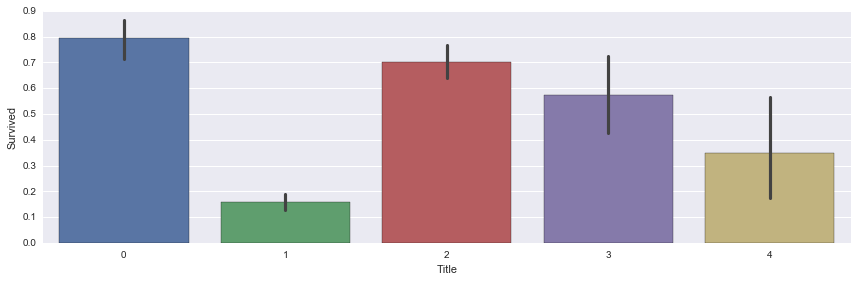

In [52]:
sns.factorplot(x='Title',y='Survived',data=train_df,size=4, aspect=3, kind='bar', order=[0,1,2,3,4])